<a href="https://colab.research.google.com/github/Classymotion/pytorch-CycleGAN-and-pix2pix/blob/master/qna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import numpy as np
import random

class PA():
    def __init__(self):

        import os
        from transformers import PreTrainedTokenizerFast
        self.tokenizer = PreTrainedTokenizerFast.from_pretrained('model_save', bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>')       
        os.environ["TOKENIZERS_PARALLELISM"] = "false"
        
        from transformers import AutoModelForCausalLM
        self.model =  AutoModelForCausalLM.from_pretrained('model_save')

        # this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
        # otherwise the tokenizer and model tensors won't match up
        self.model.resize_token_embeddings(len(self.tokenizer))

        # Tell pytorch to run this model on the GPU.
        self.device = torch.device("cuda") 
        self.model.cuda()

        # Set the seed value all over the place to make this reproducible.
        seed_val = 42

        random.seed(seed_val)
        np.random.seed(seed_val)
        torch.manual_seed(seed_val)
        torch.cuda.manual_seed_all(seed_val)
        
    def question_and_answer(self, prompt): 
        generated = torch.tensor(self.tokenizer.encode(prompt)).unsqueeze(0)
        generated = generated.to(self.device)

        sample_outputs = self.model.generate(
                                          generated, 
                                          #bos_token_id=random.randint(1,30000),
                                          do_sample=True,   
                                          top_k=50, 
                                          max_length = 300,
                                          top_p=0.95, 
                                          #num_return_sequences=10,
                                          )
        answer = self.tokenizer.decode(sample_outputs[0], skip_special_tokens=True)
        return answer
    
    def recursive_questioning(self, prompt, n_attempts):
        answer = self.question_and_answer(prompt)
        n_attempts += 1
        if n_attempts > 10:
            return answer # 1) is to be called

        prefix = prompt + " 답변:"
        if answer.startswith(prefix) and answer.count('답변:') == 1 and answer.count('질문:') == 0:
            ai_answer = answer.replace(prefix, "AI: ")
            return(ai_answer)
        else:
            # 2) Wrong syntax ###################################
            # recursive_questioning(prompt, n_attempts)
            # return <- this is returned before 1) is returned
            #####################################################

            # 3) Right syntax ###################################
            return self.recursive_questioning(prompt, n_attempts)
            #####################################################
            
    def start_session(self):
        n_attempts = 0
        for i in range(4):
            prompt = input('Q: ')
            if prompt == '1':
                #%run pol_defects.ipynb
                #self.show_poldefects();
                self.show_fig()
                continue
            qna_answer = self.recursive_questioning(prompt, n_attempts)
            print(qna_answer)
                       
    def show_poldefects(self):
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        import pandas as pd
        #matplotlib inline

        columns = ['norm_size', 'defects', 'data']

        # Load the data
        df = pd.read_csv('SYE_data.csv', names=columns)

        def show_table():  
            # Load the data
            return pd.read_csv('SYE_data.csv', names=columns)

        def show_graph():
            sns.lmplot(x ='norm_size', y ='defects', data = df, hue ='data', markers =['o', 'v'], aspect = 2)

        #show_table().head()
        show_graph()

    def show_fig(self):
        fig = MyData()
        fig.plot()

        
import matplotlib.pyplot as plt
class MyData:
  def __init__(self):
    self.data = [1, 2, 3]
    self.time = [2, 5, 4]

  def plot(self):
    plt.plot(self.time, self.data)
    plt.show()
    print('ok')
    


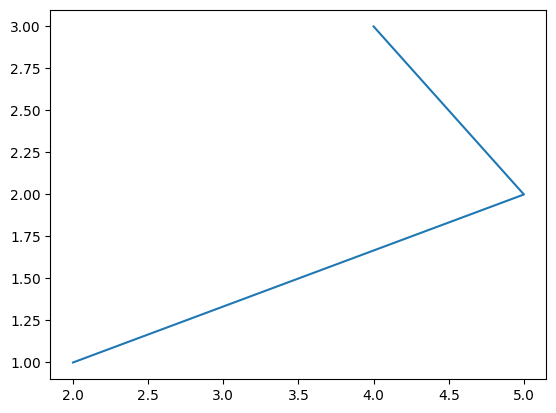

ok


In [6]:
fig = MyData()
fig.plot()